<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import torch

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [253]:
mnist_train = datasets.FashionMNIST(root = "Data" , train = True ,download = True , transform = ToTensor() , target_transform = None)
mnist_test = datasets.FashionMNIST(root = "Data" , train = False ,download = True , transform = ToTensor() , target_transform = None)

In [254]:
len(mnist_train) , len(mnist_test)

(60000, 10000)

In [255]:
class_labels = mnist_train.classes

In [256]:
mnist_train.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

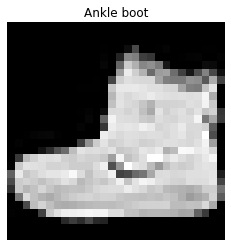

In [257]:
plt.imshow(mnist_train.data[0] , cmap = "gray")
plt.title(class_labels[mnist_train.targets[0]])
plt.axis(False)

In [258]:
def plot_random_images(number_of_images = 16 , data = mnist_train):
  ''' plot random images of selected datasets with their labels
  '''
  plt.figure(figsize = (12 , 8))
  for i in range(1 , number_of_images + 1):
    plt.subplot(4 , 4 , i)
    rand = torch.randint(0, len(mnist_train), size =[1]).item()
    img , label = mnist_train[rand]
    plt.imshow(torch.squeeze(img), cmap = "gray")
    plt.title(class_labels[label])
    plt.axis(False)

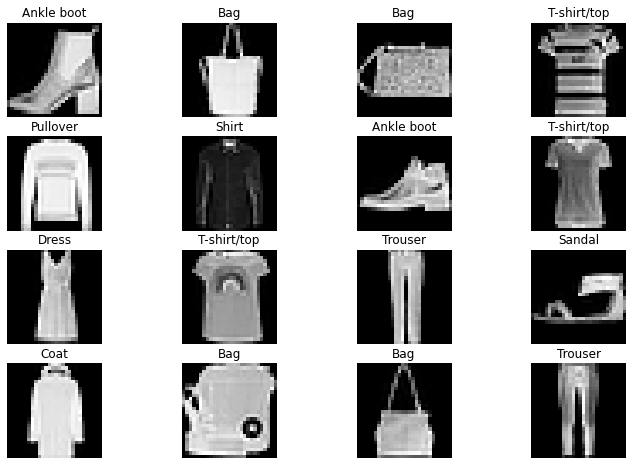

In [259]:
plot_random_images()

In [260]:
train_dataLoader = DataLoader(dataset = mnist_train , batch_size = 32 , shuffle = True)
train_dataLoader

In [261]:
test_dataLoader = DataLoader(dataset = mnist_test , batch_size = 32 , shuffle = False)
test_dataLoader

In [262]:
def plot_first_batch(dataLoader, batch_size = 32):
  img , label = next(iter(dataLoader))
  plt.figure(figsize = (20 ,14))
  for i in range( len(img)):
    plt.subplot(4,8 , i+1)
    plt.imshow(img[i].squeeze() , cmap = "gray")
    plt.title(class_labels[label[i]])
    plt.axis(False)

In [263]:
class FashionMnistModel0(torch.nn.Module):
  def __init__(self , input_layer:int , hidden_layer:int , output_layer:int):
    super().__init__()
    self.layerStacks = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = input_layer , out_features = hidden_layer),
        torch.nn.Linear(in_features = hidden_layer , out_features = output_layer)
    )
  
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.layerStacks(x)

In [264]:
model0 = FashionMnistModel0(input_layer = 28 * 28 , hidden_layer = 128 , output_layer = len(class_labels))

In [265]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters() , lr = 0.001)

In [266]:
from tqdm.auto import tqdm
import timeit

device = "cuda" if torch.cuda.is_available() else "cpu"

In [267]:
def calclulate_timer(start_time , end_time , device = device):
  ''' this method's been created for calculating process time on the selcted device
  args:
     start_time: timeit.Timer().timer() before operation
     end_time: timeit.Timer().timer() after operation
  output:
     print end_time - start_time 
  '''
  start = start_time
  end = end_time
  time = end - start
  return time

In [268]:
len(train_dataLoader)

1875

In [269]:
#training-part
epochs = 3
start = timeit.Timer().timer()

for step in tqdm(range(epochs)):
  train_loss = 0

  for batch , (data , label) in enumerate(train_dataLoader):
    #train
    model0.train()

    #pass data
    train_preds = model0(data)

    #calculate loss
    loss = loss_fn(train_preds , label)
    train_loss = train_loss + loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()
    if (batch + 1) % 400 == 0:
      print(f"number of data passed\t{(batch + 1) * len(data)}")
    
  
  train_loss = train_loss / len(train_dataLoader)

  model0.eval()
  with torch.inference_mode():
    test_loss = 0
    for data , label in test_dataLoader:
      test_preds = model0(data)
      loss = loss_fn(test_preds , label)
      test_loss = test_loss + loss
    test_loss = test_loss / len(test_dataLoader)
  
  print(f"\ntrain loss is {train_loss}\t test loss is {test_loss}\n")
end = timeit.Timer().timer()
calclulate_timer(start_time = start , end_time = end , device = "cuda" if torch.cuda.is_available() else "cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 1.7058615684509277	 test loss is 1.2794493436813354

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 1.0820120573043823	 test loss is 0.9639288783073425

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 0.882186770439148	 test loss is 0.8418186902999878



24.558001006000268

In [270]:
import requests
import os
r = requests.get( "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
     

if os.path.exists("/content/helper_functions.py"):
  print("file already exists")
else:
  f = open("helper_functions.py" , 'wb')
  f.write(r.content)

file already exists


In [294]:
from helper_functions import accuracy_fn

#create evaluation method
def model_evaluation(model:torch.nn.Module, loss_function:torch.nn.Module, dataLoader:torch.utils.data.DataLoader , device = device):
  ''' this method will evaluate the model
  arg:
     model: your model which you want to evaluate
     loss_function: your loss function
     dataLoader: your data that in the format of torch.utils.data.DataLoader
     device: which device you are runing the code
  output: return a dicianary contains
     test loss
     test_accuracy
     process time
     device
     '''
     
  start = timeit.Timer().timer()
  device = "cuda" if torch.cuda.is_available() else "cpu"
 
  model.eval()
  with torch.inference_mode():
    
    test_loss = 0
    test_accuracy = 0

    for data , label in dataLoader:

      data = data.to(device)
      label = label.to(device)
      preds = model(data)

      loss = loss_function(preds , label)
      test_loss = test_loss + loss

      accuracy = accuracy_fn(label , torch.argmax(preds, dim = 1))
      test_accuracy = test_accuracy + accuracy

    
    test_loss = test_loss / len(dataLoader)
    test_accuracy = test_accuracy / len(dataLoader)
  
  end = timeit.Timer().timer()
  evaluation_process_time = calclulate_timer(start_time = start , end_time = end , device = device)

  return {"Test Loss" : round(test_loss.item() , 4),
          "Test Accuracy": round(test_accuracy , 2),
          "Evaluation Time":f"{evaluation_process_time:0.2f}s",
          "Model Name":f"{model.__class__.__name__}",
          "Evaluated On":device}




In [295]:
model0_evaluation = model_evaluation(model0.to(device) , loss_fn , test_dataLoader , device = device)
model0_evaluation

{'Test Loss': 0.8418,
 'Test Accuracy': 70.61,
 'Evaluation Time': '0.93s',
 'Model Name': 'FashionMnistModel0',
 'Evaluated On': 'cuda'}

In [273]:
class FashionMNISTModel1(torch.nn.Module):
  '''this class is built with RelU activaiton functions
  '''
  def __init__(self, input_shape:int , hidden_shape:int , output_shape:int):
    super().__init__()
    self.stack_layers = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = input_shape , out_features = hidden_shape),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = hidden_shape , out_features = output_shape),
        torch.nn.ReLU()
    )

  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.stack_layers(x)

In [274]:
model1 = FashionMNISTModel1(input_shape = 28 * 28 , hidden_shape = 128 , output_shape = len(class_labels)).to(device)

In [275]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters() , lr = 0.01)

In [276]:
def training(model:torch.nn.Module,
             dataLoader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             optimizer:torch.optim.Optimizer,
             accuracy_function,
             device = device):
  
  model.train()
  train_loss = 0
  train_accuracy = 0

  for batch , (data , label) in enumerate(dataLoader):

    data = data.to(device)
    label = label.to(device)

    train_preds_logits = model(data)
    train_preds = torch.argmax(train_preds_logits , dim = 1)
    accuracy = accuracy_function(label , train_preds)

    loss = loss_function(train_preds_logits , label)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"number of data passed {batch * len(data)}/{len(dataLoader) * len(data)}")
    
    train_loss = train_loss + loss
    train_accuracy = train_accuracy + accuracy
  
  train_loss = train_loss / len(dataLoader)
  train_accuracy = train_accuracy / len(dataLoader)

  print(f"Train Loss: {train_loss:0.5f} | Train Accuracy: {train_accuracy:0.2f}%")


In [277]:
def testing(model:torch.nn.Module,
             dataLoader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             accuracy_function,
             device = device):
  
  test_loss = 0
  test_accuracy = 0

  model.eval()
  with torch.inference_mode():
    for batch , (data , label) in enumerate(dataLoader):
      data = data.to(device)
      label = label.to(device)

      test_preds_logits = model(data)
      test_preds = torch.argmax(test_preds_logits , dim = 1)
      accuracy = accuracy_function(label , test_preds)

      loss = loss_function(test_preds_logits , label)

      test_loss = test_loss + loss
      test_accuracy = test_accuracy + accuracy
    
  test_loss = test_loss / len(dataLoader)
  test_accuracy = test_accuracy / len(dataLoader)

  print(f"Test Loss: {test_loss:0.5f} | Test Accuracy: {test_accuracy:0.2f}%\n")

In [278]:
epochs = 3
start = timeit.Timer().timer()

for epoch in tqdm(range(epochs)):
  print(f"---- Epoch {epoch + 1}/{epochs} ----\n")
  training(model1,
           train_dataLoader,
           loss_function = loss_fn,
           optimizer = optimizer,
           accuracy_function = accuracy_fn,
           device = device)
  testing(model1,
          test_dataLoader,
          loss_function = loss_fn,
          accuracy_function = accuracy_fn,
          device = device)
end = timeit.Timer().timer()

process_time = calclulate_timer(start_time = start , end_time = end, device = device)
print(f"Process Time: {process_time:0.2f} seconds.")

  0%|          | 0/3 [00:00<?, ?it/s]

---- Epoch 1/3 ----

number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 1.49145 | Train Accuracy: 50.87%
Test Loss: 1.25000 | Test Accuracy: 56.54%

---- Epoch 2/3 ----

number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 1.17744 | Train Accuracy: 58.82%
Test Loss: 1.15241 | Test Accuracy: 58.70%

---- Epoch 3/3 ----

number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 1.11249 | Train Accuracy: 59.97%
Test Loss: 1.12033 | Test Accuracy: 59.48%

Process Time: 26.40 seconds.


In [296]:
model1_evaluation = model_evaluation(model1 , loss_fn , test_dataLoader)
model1_evaluation

{'Test Loss': 1.1203,
 'Test Accuracy': 59.48,
 'Evaluation Time': '0.93s',
 'Model Name': 'FashionMNISTModel1',
 'Evaluated On': 'cuda'}

In [280]:
from torch.nn import Sequential
class FashionMNISTModel2(torch.nn.Module):
  def __init__(self, input_shape:int , hidden_shape:int , output_shape:int):
    super().__init__()
    self.conv_block1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = input_shape , out_channels = hidden_shape , kernel_size = 3 , stride = 1 , padding = 1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels = hidden_shape , out_channels = hidden_shape , kernel_size = 3 , stride = 1 , padding = 1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = hidden_shape , out_channels = hidden_shape , kernel_size = 3 , stride = 1 , padding = 1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels = hidden_shape , out_channels = hidden_shape , kernel_size = 3 , stride = 1 , padding = 1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2)
    )

    self.dense_block = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = hidden_shape*7*7 , out_features= hidden_shape),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = hidden_shape , out_features=output_shape),
        torch.nn.ReLU()
    )


  def forward(self, x:torch.Tensor) -> torch.Tensor:
    x = self.conv_block1(x)
    #print(f"shape of block 1: {x.shape}")
    x = self.conv_block2(x)
    #print(f"shape of block 2: {x.shape}")
    return self.dense_block(x)

In [281]:
model2 = FashionMNISTModel2(input_shape = 1 , hidden_shape = 128 , output_shape = 10).to(device)
model2

FashionMNISTModel2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [282]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters() , lr = 0.1)

In [283]:
epochs = 3
start = timeit.Timer().timer()

for epoch in tqdm(range(epochs)):
  print(f"---- Epochs {epoch}/{epochs} ----")
  training(model2 , train_dataLoader , loss_function = loss_fn , optimizer = optimizer , accuracy_function = accuracy_fn)
  testing(model2 , test_dataLoader , loss_function = loss_fn , accuracy_function = accuracy_fn)

end = timeit.Timer().timer()

process_time = calclulate_timer(start_time = start , end_time = end , device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

---- Epochs 0/3 ----
number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 0.61418 | Train Accuracy: 78.03%
Test Loss: 0.33655 | Test Accuracy: 87.50%

---- Epochs 1/3 ----
number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 0.28546 | Train Accuracy: 89.43%
Test Loss: 0.28908 | Test Accuracy: 89.23%

---- Epochs 2/3 ----
number of data passed 0/60000
number of data passed 12800/60000
number of data passed 25600/60000
number of data passed 38400/60000
number of data passed 51200/60000
Train Loss: 0.22775 | Train Accuracy: 91.65%
Test Loss: 0.24896 | Test Accuracy: 90.83%



In [297]:
model2_evaluation = model_evaluation(model2 , loss_function = loss_fn , dataLoader = test_dataLoader , device = device)

In [298]:
model1_evaluation

{'Test Loss': 1.1203,
 'Test Accuracy': 59.48,
 'Evaluation Time': '0.93s',
 'Model Name': 'FashionMNISTModel1',
 'Evaluated On': 'cuda'}

In [299]:
model2_evaluation

{'Test Loss': 0.249,
 'Test Accuracy': 90.83,
 'Evaluation Time': '1.63s',
 'Model Name': 'FashionMNISTModel2',
 'Evaluated On': 'cuda'}

In [300]:
model0_evaluation

{'Test Loss': 0.8418,
 'Test Accuracy': 70.61,
 'Evaluation Time': '0.93s',
 'Model Name': 'FashionMnistModel0',
 'Evaluated On': 'cuda'}

In [301]:
import pandas as pd
evals = pd.DataFrame({"model0":model0_evaluation , "model1":model1_evaluation , "model2": model2_evaluation}).transpose()

<BarContainer object of 3 artists>

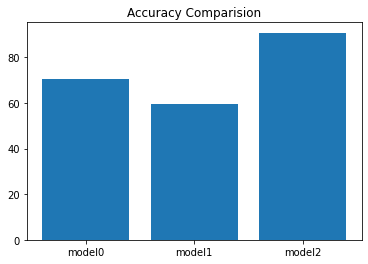

In [305]:
plt.title("Accuracy Comparision")
plt.bar(evals.index , evals["Test Accuracy"])

In [290]:
import random
def plot_random_predictions(model:torch.nn.Module, data, rows = 3 , columns = 3 , figure_size = (15 , 10)):
  '''plot random data with their predicts '''
  samples = []
  labels = []

  plt.figure(figsize = figure_size)

  for i in range(rows * columns):
    rand = random.randint(0 , len(data))
    sample , label = data[rand]
    samples.append(sample)
    labels.append(label)

    plt.subplot(rows , columns , i + 1)
    plt.imshow(sample.squeeze() , cmap = "gray")

    pred_logits = model(sample.unsqueeze(dim = 0).to(device))
    pred = torch.argmax(pred_logits , dim = 1)
    pred = class_labels[pred]

    title = f"Predict: {pred} | Label: {class_labels[label]}"

    if pred == class_labels[label]:
      plt.title(title , fontsize = 12 , color = "green")
    else:
      plt.title(title , fontsize = 12 , color = "red")
    plt.axis(False)


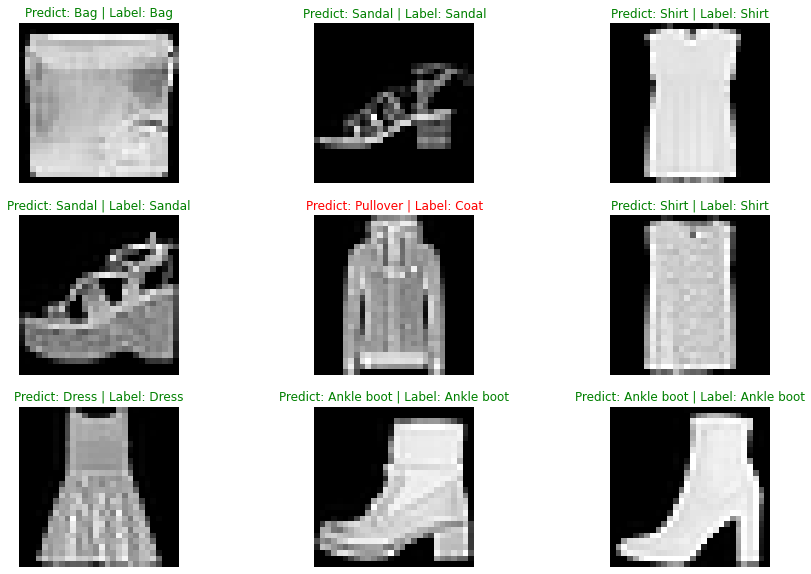

In [306]:
plot_random_predictions(model2 , mnist_test , rows = 3 , columns = 3 , figure_size = (15 , 10))